In [75]:
# importing library
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [76]:
# fetching the data
df_train = pd.read_csv('train.csv')

In [77]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [78]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

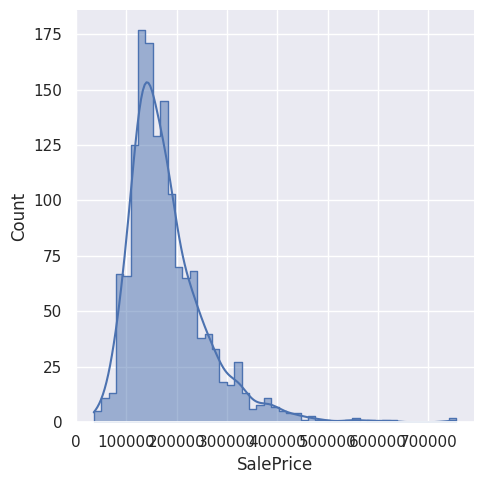

In [79]:
sns.displot(df_train['SalePrice'],kde=True, element='step');

In [80]:
# skewness and kurtosis
print("Skewness: %f" %df_train['SalePrice'].skew())
print("Kurtosis: %f" %df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


<AxesSubplot: xlabel='GrLivArea', ylabel='SalePrice'>

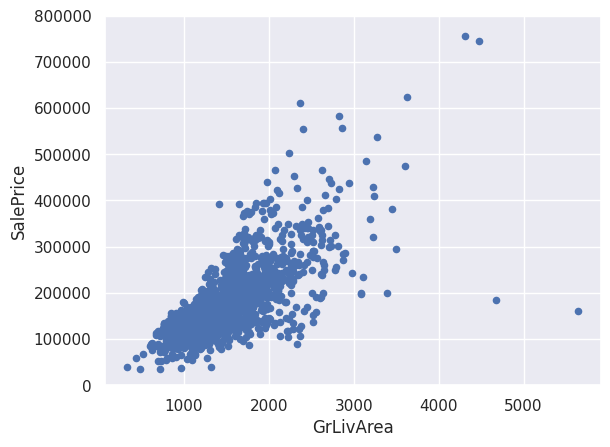

In [81]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))


In [82]:
data

,SalePrice,GrLivArea
0,208500,1710
1,181500,1262
2,223500,1786
3,140000,1717
4,250000,2198
...,...,...
1455,175000,1647
1456,210000,2073
1457,266500,2340
1458,142125,1078


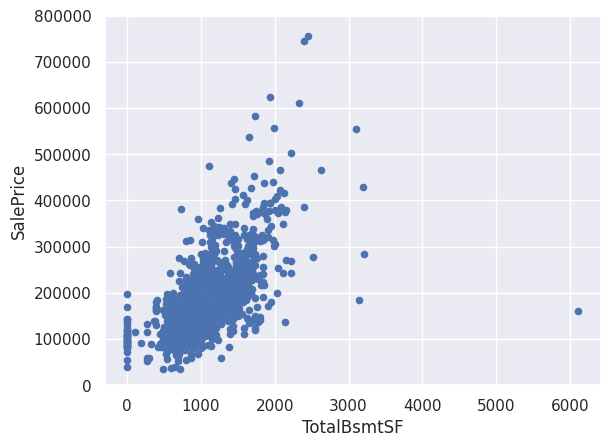

In [83]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

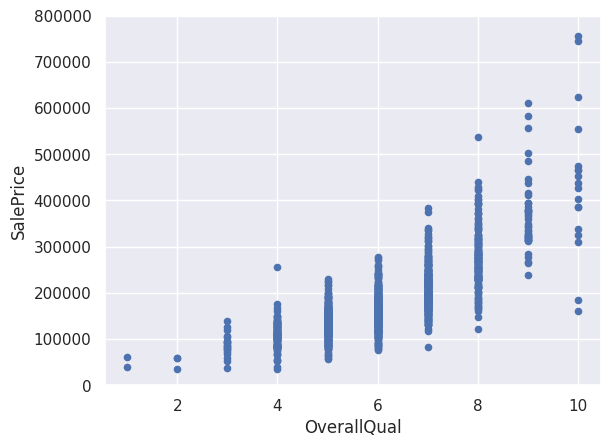

In [84]:
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

(-0.5, 9.5, 0.0, 800000.0)

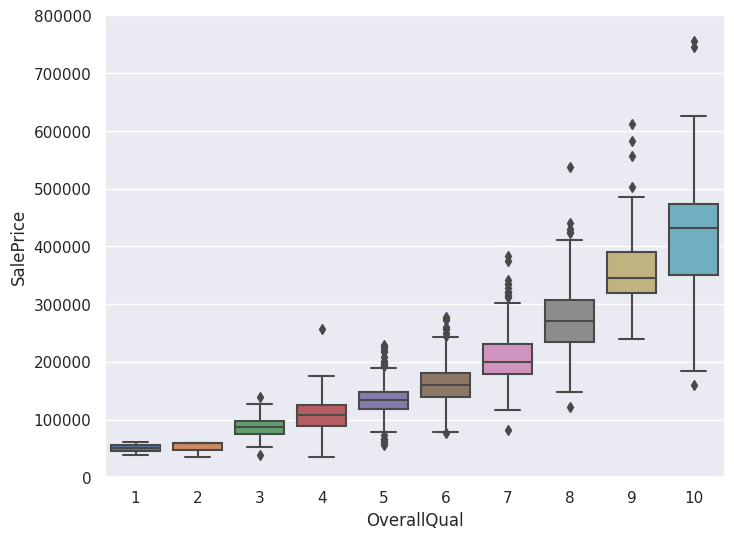

In [85]:
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax= plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 [Text(0, 0, '1872'),
  Text(1, 0, '1875'),
  Text(2, 0, '1880'),
  Text(3, 0, '1882'),
  Text(4, 0, '1885'),
  Text(5, 0, '1890'),
  Text(6, 0, '1892'),
  Text(7, 0, '1893'),
  Text(8, 0, '1898'),
  Text(9, 0, '1900'),
  Text(10, 0, '1904'),
  Text(11, 0, '1905'),
  Text(12, 0, '1906'),
  Text(13, 0, '1908'),
  Text(14, 0, '1910'),
  Text(15, 0, '1911'),
  Text(1

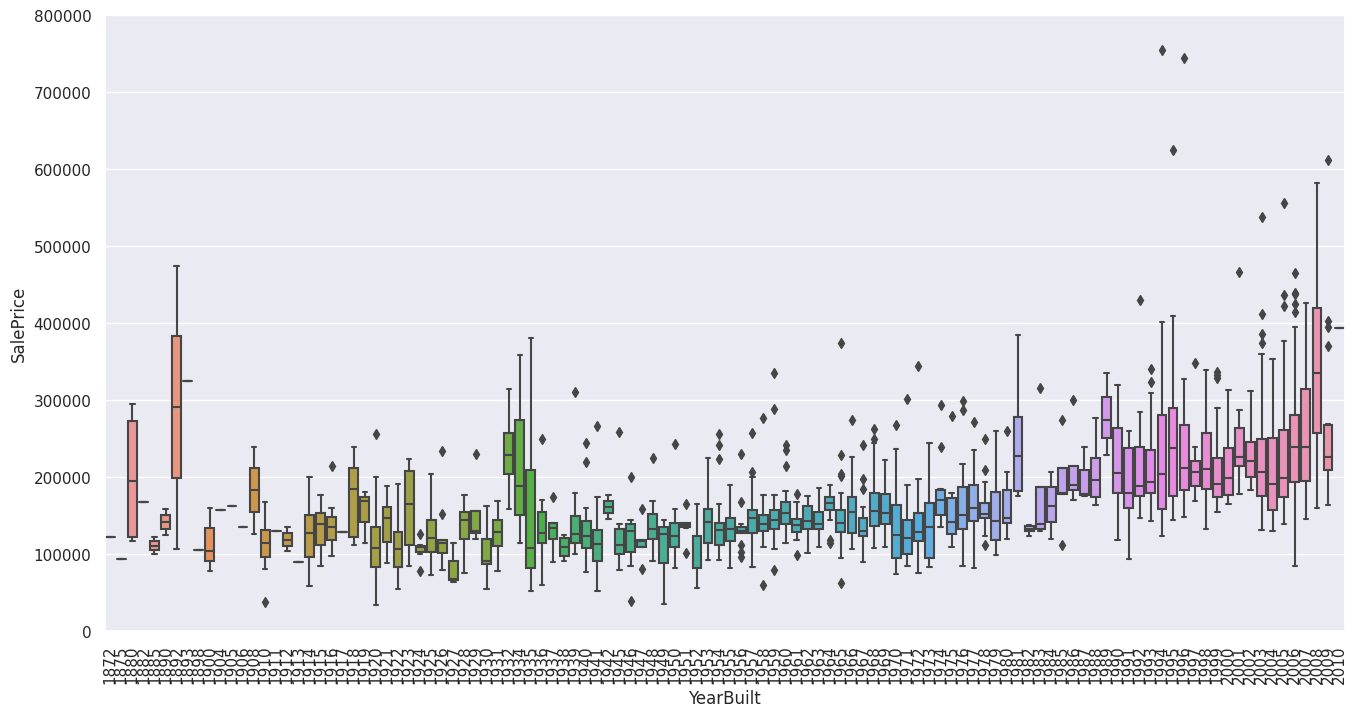

In [86]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y='SalePrice',data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)

<AxesSubplot: >

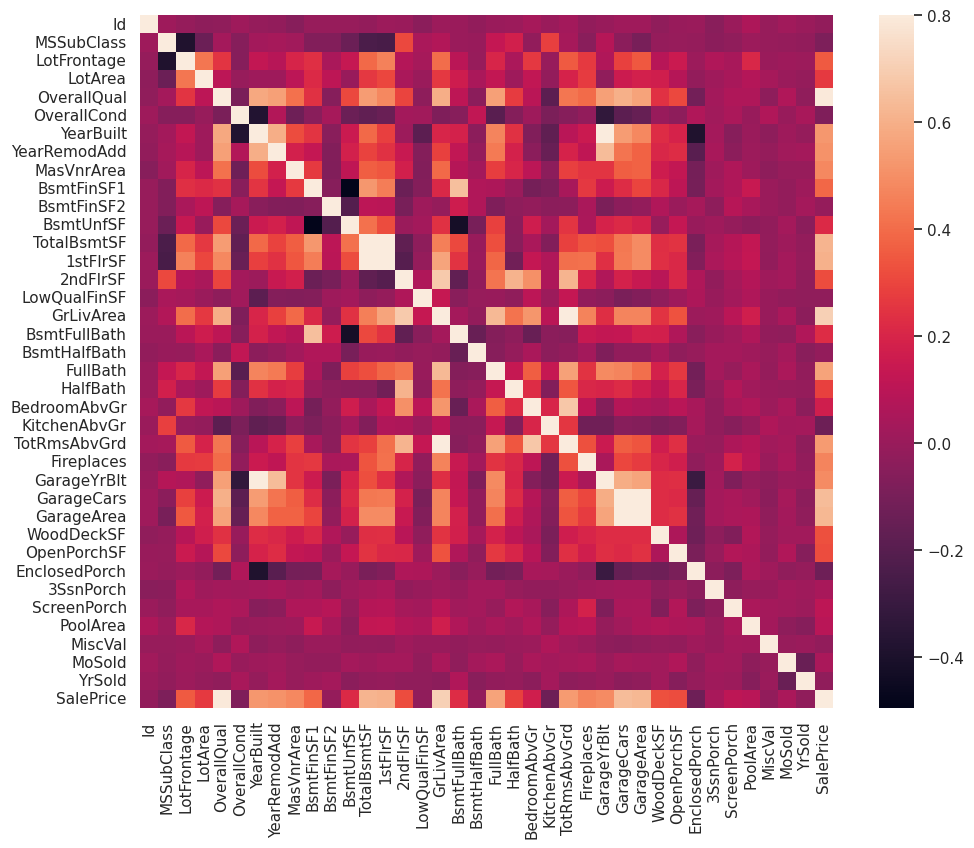

In [87]:
# correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)

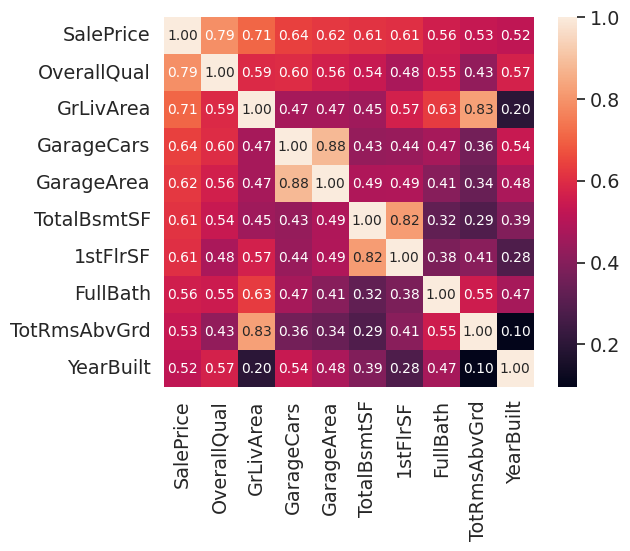

In [88]:
# saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

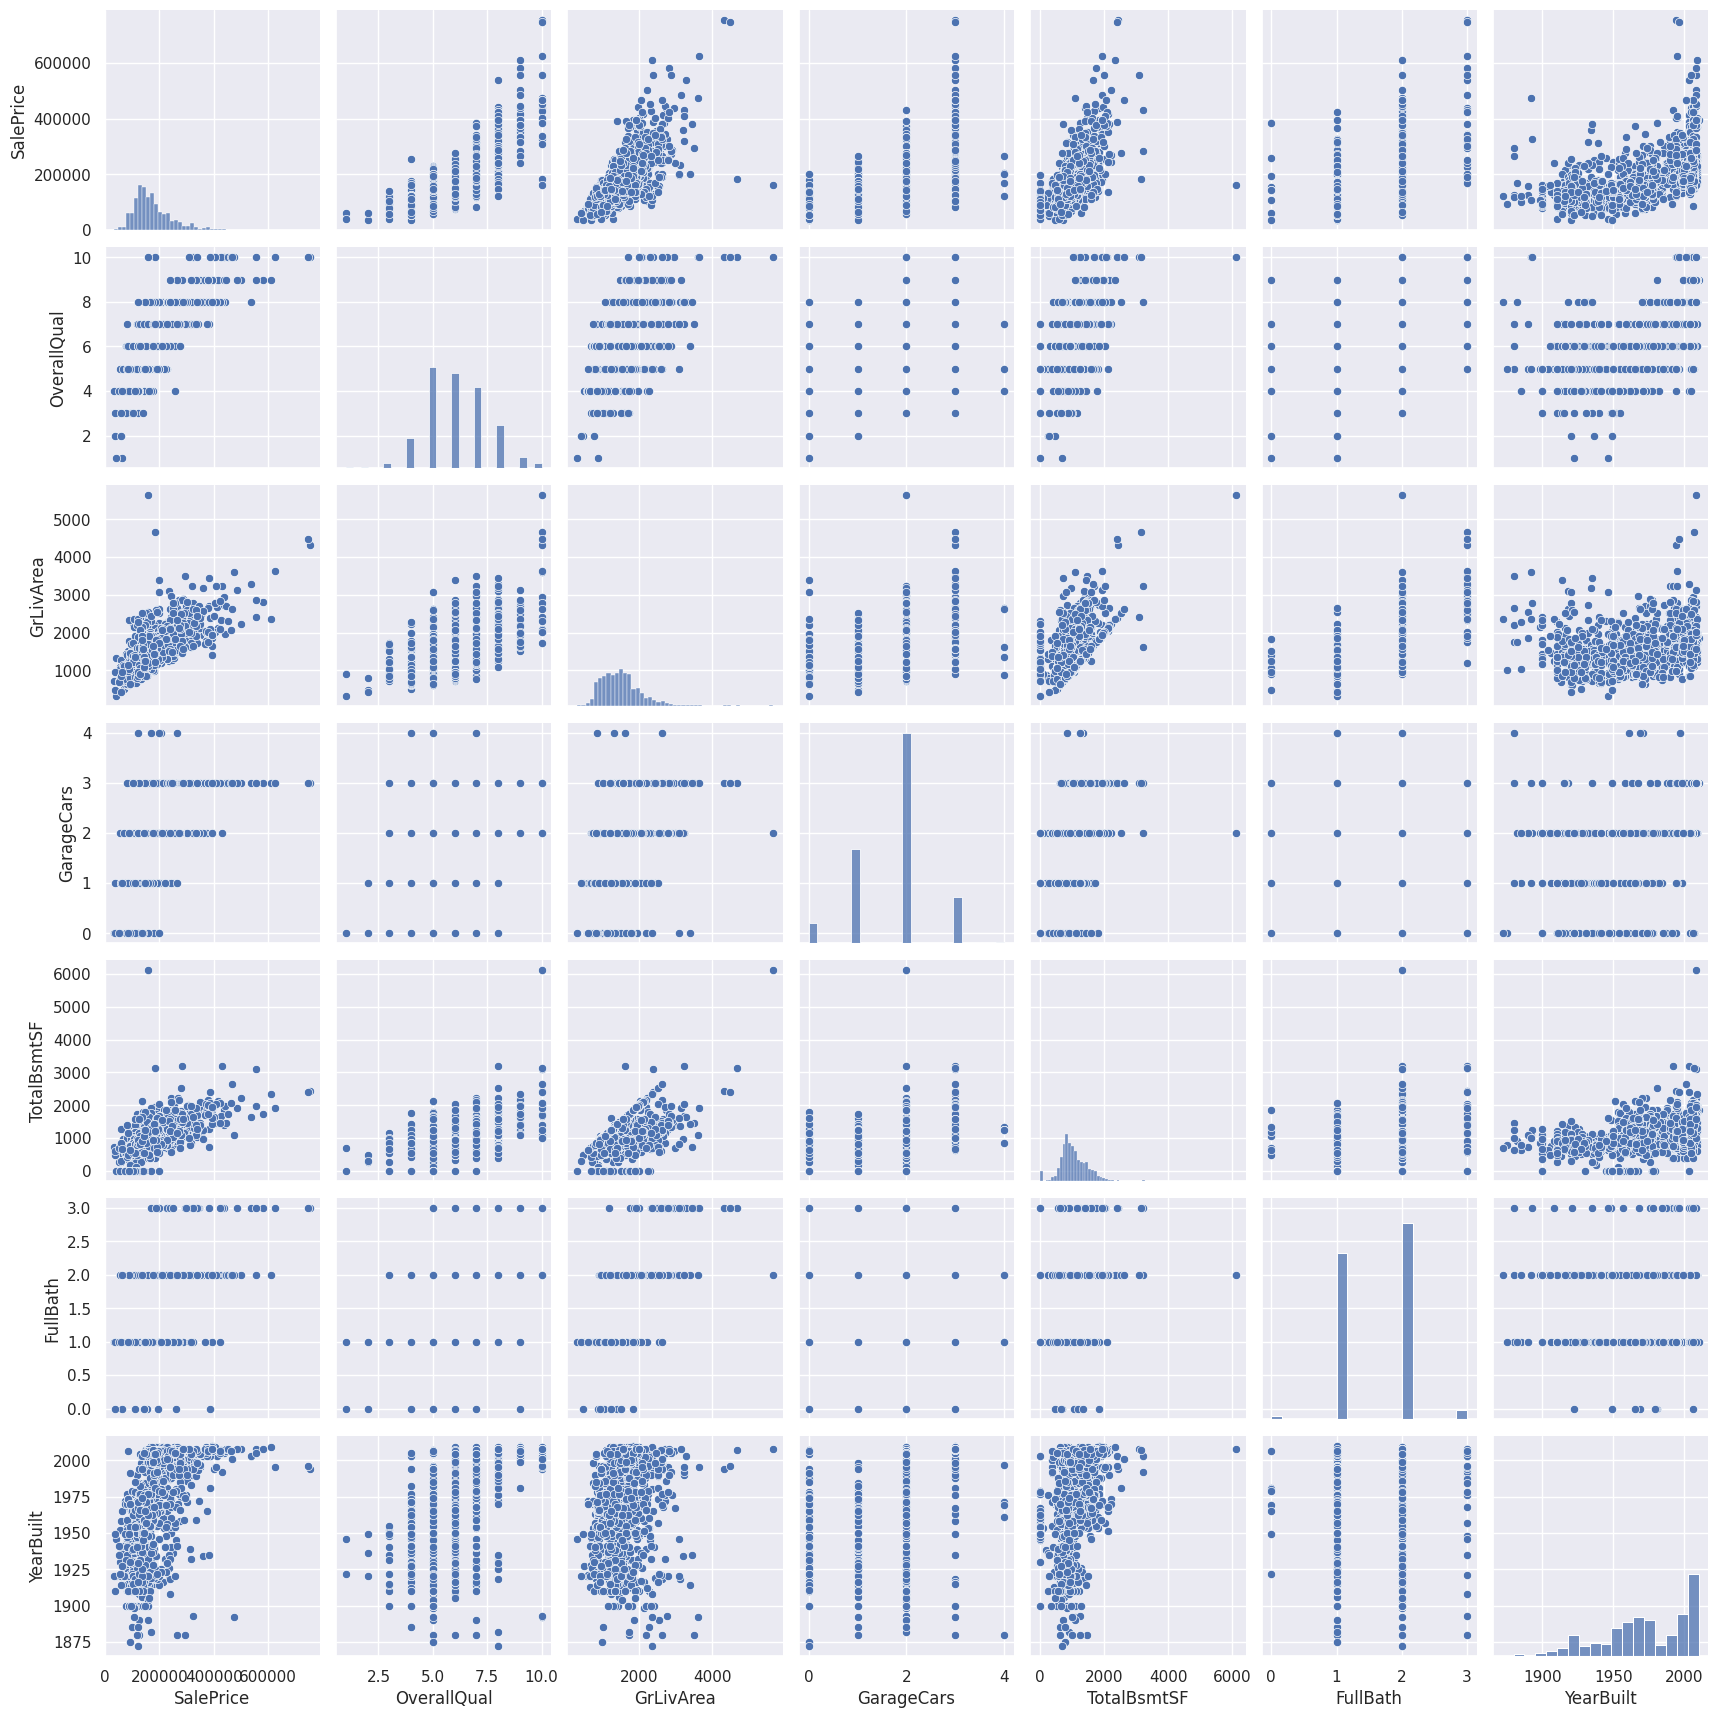

In [89]:
#scatter plot
sns.set()
cols = ['SalePrice','OverallQual','GrLivArea','GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols],size=2.5)
plt.show()

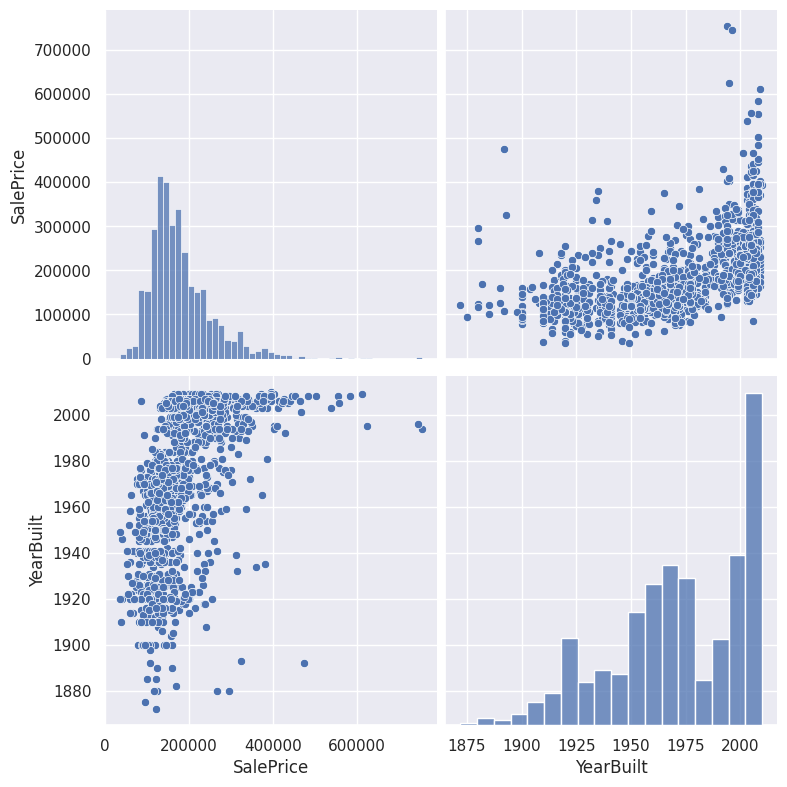

In [90]:
#scatter plot
sns.set()
cols = ['SalePrice', 'YearBuilt']
sns.pairplot(df_train[cols],size=4)
plt.show()

In [91]:
# missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [92]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [94]:
missing_data['Total']>1

PoolQC          True
MiscFeature     True
Alley           True
Fence           True
FireplaceQu     True
               ...  
ExterQual      False
Exterior2nd    False
Exterior1st    False
RoofMatl       False
SalePrice      False
Name: Total, Length: 81, dtype: bool

In [95]:
df_train((missing_data['Total']>1).index,1)

TypeError: 'DataFrame' object is not callable

In [97]:
df_train.shape

(1460, 81)

In [98]:
df_train = df_train.drop((missing_data[missing_data['Total']>1]).index,1)

In [102]:
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)

In [104]:
df_train.isnull().sum().max() # just checking that there's no missing data missing...

0

In [111]:
from sklearn.preprocessing import StandardScaler

In [114]:
# standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis])

In [127]:
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10] #In NumPy, the argsort method returns the indices that would sort an array.

In [130]:
high_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]

In [132]:
print('outer range (low) of the distribution')
print(low_range)
print('\nounter range (high) of the distribution')
print(high_range)

outer range (low) of the distribution
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

ounter range (high) of the distribution
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


In [139]:
a =pd.DataFrame(saleprice_scaled)
a.describe()

,0
count,1.459000e+03
mean,3.896053e-17
std,1.000343e+00
min,-1.838208e+00
25%,-6.417332e-01
50%,-2.257050e-01
75%,4.162750e-01
max,7.226298e+00


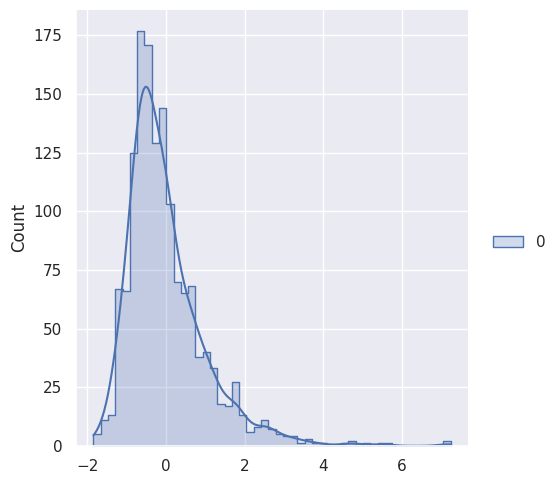

In [133]:
sns.displot(saleprice_scaled,kde=True, element='step')

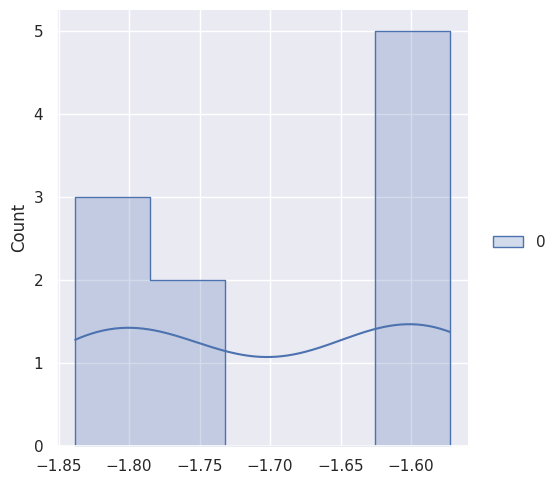

In [140]:
sns.displot(low_range,kde=True, element='step')

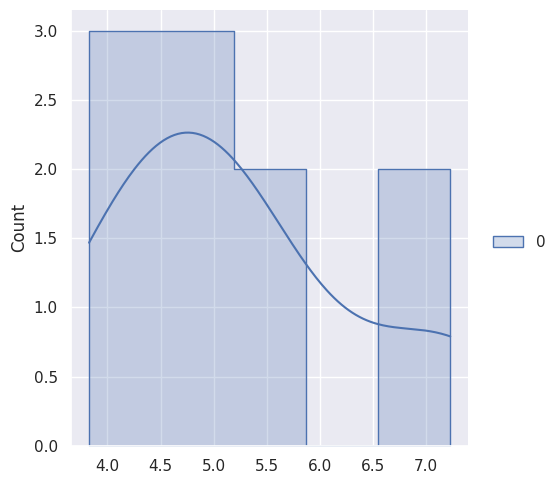

In [141]:
sns.displot(high_range,kde=True, element='step')

<AxesSubplot: xlabel='GrLivArea', ylabel='SalePrice'>

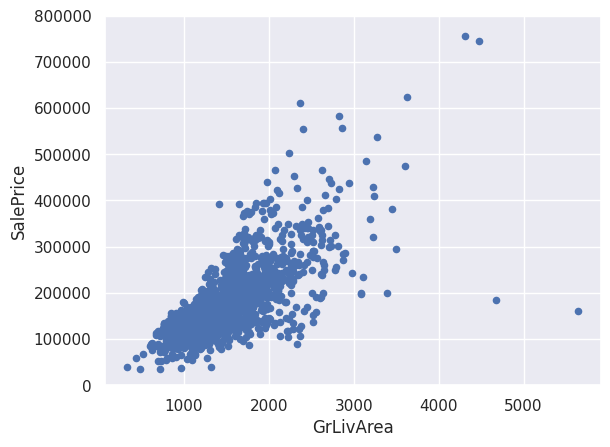

In [142]:
# bivariant analysis salesprice/grlivarea
var = "GrLivArea"
data = pd.concat([df_train['SalePrice'],df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

In [145]:
df_train.sort_values(by='GrLivArea',ascending=False)[:2]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


In [149]:
df_train = df_train.drop(df_train[df_train['Id']==1299].index)

In [152]:
df_train = df_train.drop(df_train[df_train['Id']==524].index)

<AxesSubplot: xlabel='TotalBsmtSF', ylabel='SalePrice'>

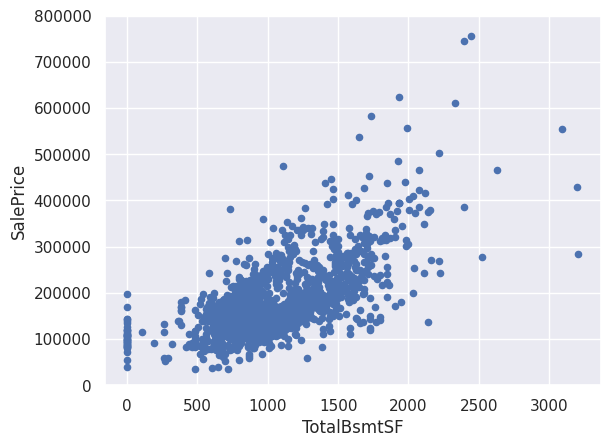

In [153]:
# bivariant analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'],df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

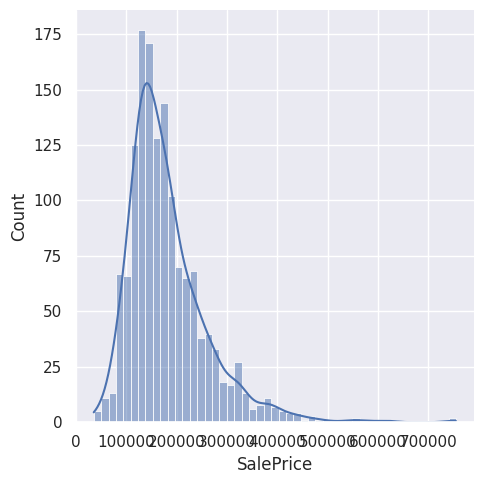

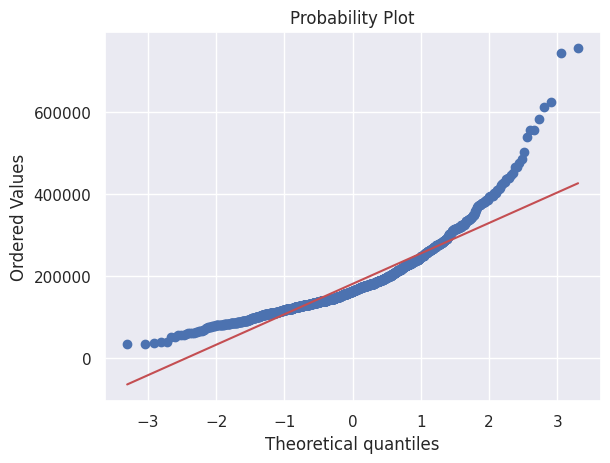

In [163]:
# histogram and normal porbability plot
sns.displot(df_train['SalePrice'], kde=True)
fig =plt.figure()
res = stats.probplot(df_train['SalePrice'],plot=plt)

In [165]:
# applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])


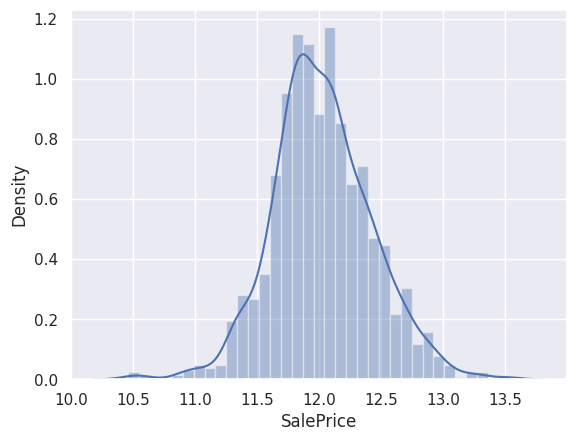

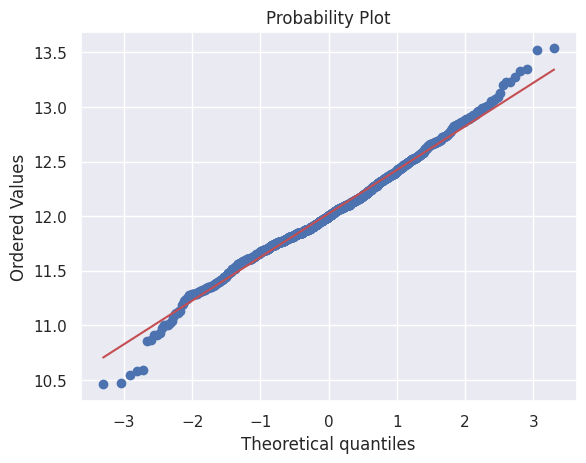

In [167]:
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice']);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

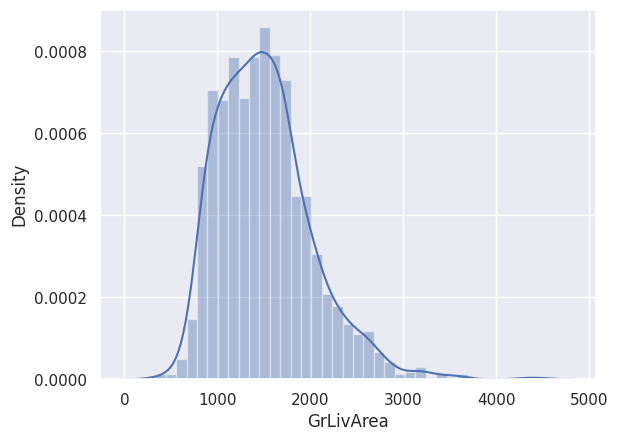

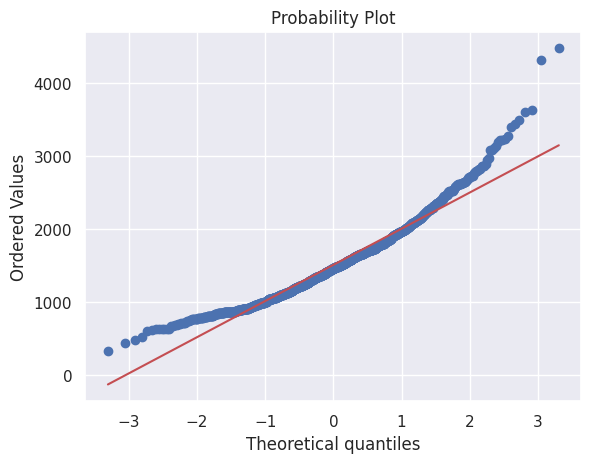

In [169]:
#histogram and normal probability plot
sns.distplot(df_train['GrLivArea']);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [170]:
#data transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

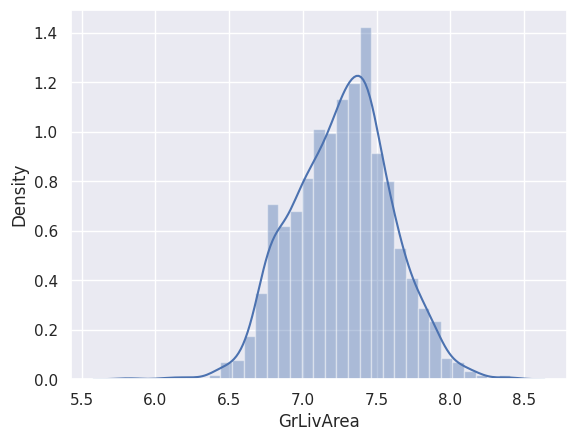

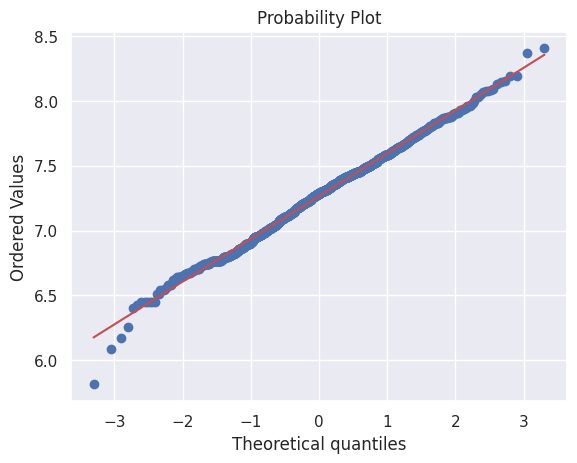

In [173]:
#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'])
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [174]:
print("Skewness: %f" %df_train['GrLivArea'].skew())

Skewness: -0.071958


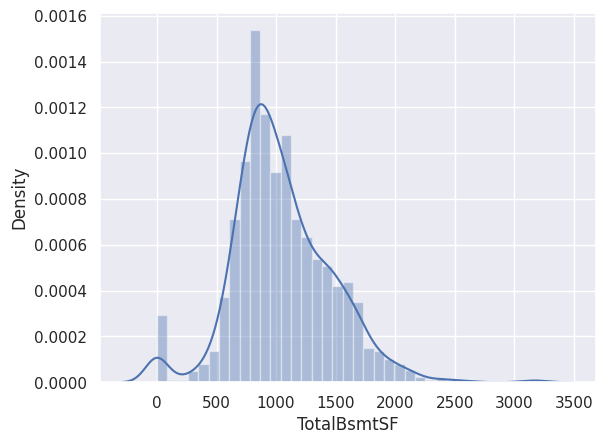

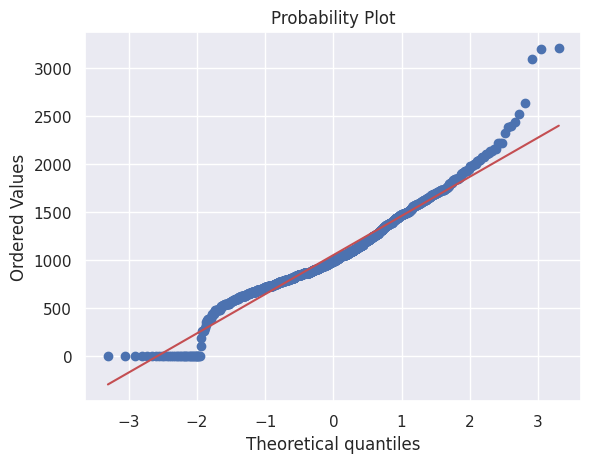

In [176]:
#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF']);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

In [181]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df_train['HasBsmt']= pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)

In [182]:
df_train['HasBsmt']=0

In [183]:
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [184]:
#transform data
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

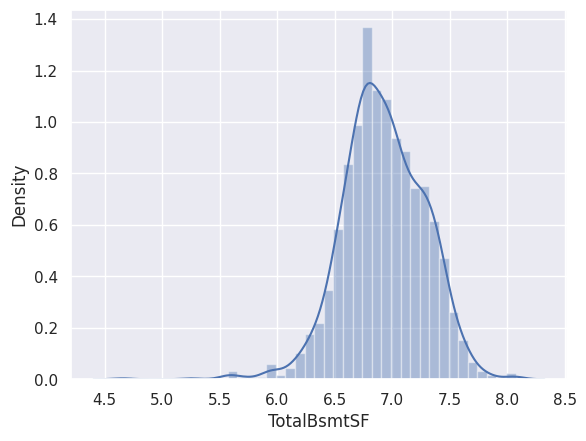

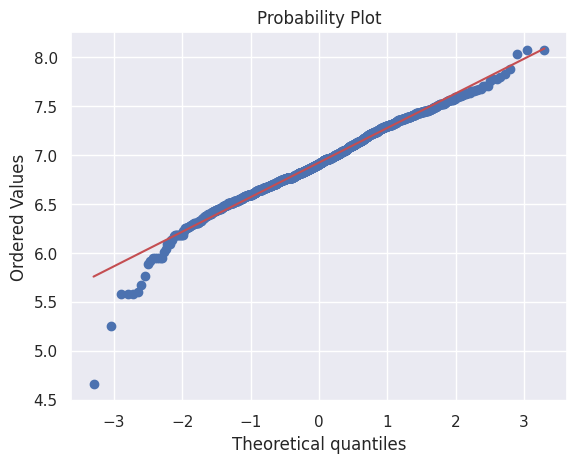

In [186]:
#histogram and normal probability plot
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF']);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)